In [14]:
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from PIL import Image

In [15]:
imagem = Image.open('CD.png')
imagem = imagem.convert('L')
imagem = np.array(imagem)


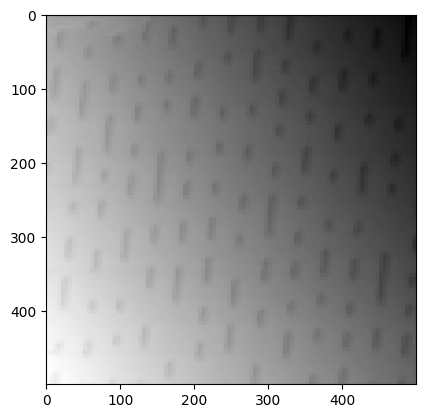

In [16]:
plt.imshow(imagem, cmap='gray')

In [17]:
def desentortar(imagem_qualquer):
    x, y = np.meshgrid(np.arange(imagem_qualquer.shape[1]), np.arange(imagem_qualquer.shape[0]))
    A = np.vstack((x.ravel(), y.ravel(), np.ones(x.size))).T
    B = imagem_qualquer.ravel()
    fit = np.linalg.lstsq(A, B, rcond=None)[0]
    plano_de_fundo = fit[0] * x + fit[1] * y + fit[2]

    imagem_nivelada = imagem_qualquer - plano_de_fundo
    
    return imagem_nivelada, plano_de_fundo

In [60]:
x, y = np.meshgrid(np.arange(imagem.shape[1]), np.arange(imagem.shape[0]))
B = imagem.ravel()
a = np.vstack((x.ravel(), y.ravel(), np.ones(x.size))).T

fit = np.linalg.lstsq(a, B, rcond=None)[0]

fit

array([-2.65483602e-01,  1.57209857e-01,  1.57546599e+02])

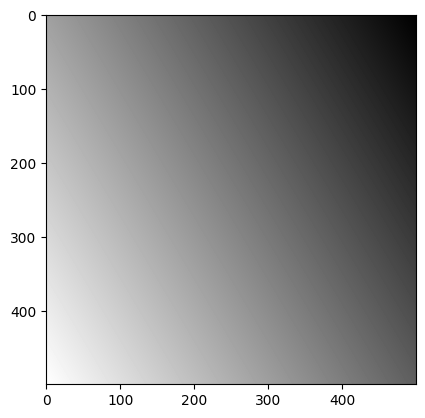

In [18]:
fundo = desentortar(imagem)[1]

plt.imshow(fundo, cmap='gray')

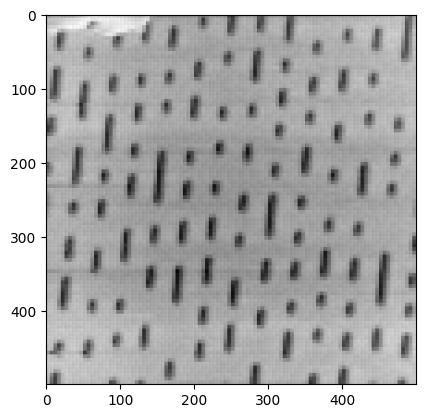

In [19]:
desentortada = desentortar(imagem)[0]

plt.imshow(desentortada,cmap='gray')

In [20]:
def normalizar(matriz_qualquer):
    max_antigo = matriz_qualquer.max()
    min_antigo = matriz_qualquer.min()
    max_novo = 255
    min_novo = 0
    
    matriz_normalizada = (matriz_qualquer - min_antigo) * (max_novo - min_novo) / (max_antigo - min_antigo) + min_novo
    return matriz_normalizada

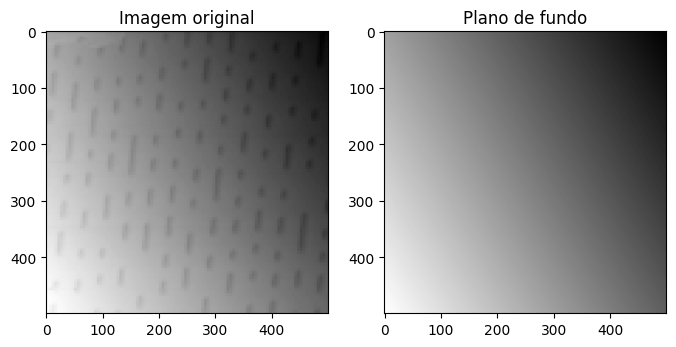

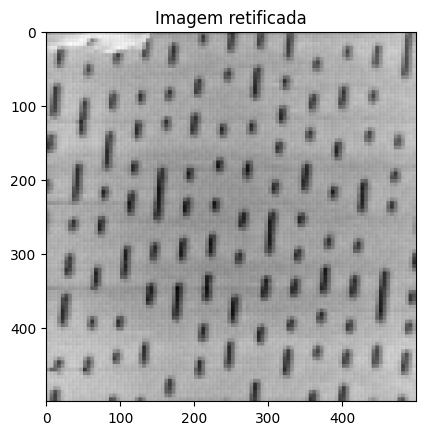

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Exibe a primeira imagem na primeira subtrama.
axs[0].imshow(imagem, cmap= 'gray')
axs[0].set_title('Imagem original')

# Exibe a segunda imagem na segunda subtrama.
axs[1].imshow(fundo, cmap= 'gray')
axs[1].set_title('Plano de fundo')

plt.show()

plt.imshow(desentortada, cmap= 'gray')
plt.title('Imagem retificada')
plt.show()


In [22]:
plano_normal = normalizar(desentortada)

In [23]:
def colorindo(imagem_cinza, matriz_cor):
    
    if matriz_cor.shape[0] != 3:
        return('Falha')
    
    cor_normalizada = matriz_cor/matriz_cor.max()
    
    
    linhas, colunas = imagem_cinza.shape
    matriz_colorida = np.empty((linhas, colunas, 3), dtype=int) 

    for i in range(linhas):
        for j in range(colunas):
            matriz_colorida[i, j] = imagem_cinza[i, j] * cor_normalizada
            
    
    
    return matriz_colorida



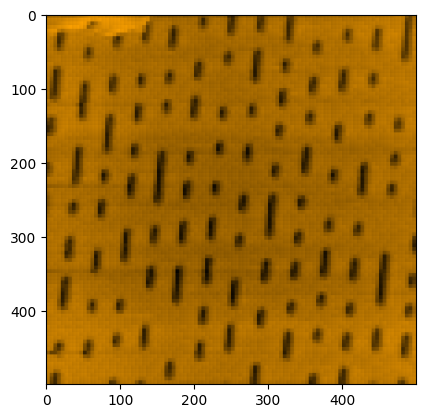

In [24]:
cor = np.array([238,152,0])

colorida = colorindo(plano_normal, cor)
plt.imshow(colorida)

In [34]:
def filtro_mediana(matriz_qualquer):

    kernel_size = 2
    altura, largura = matriz_qualquer.shape
    matriz_suavizada = np.zeros((altura, largura), dtype=np.float32)

    for i in range(altura):
        for j in range(largura):
            soma = 0
            contador = 0
            
            for m in range(-kernel_size // 2, kernel_size // 2 + 1):
                for n in range(-kernel_size // 2, kernel_size // 2 + 1):
                    if i + m >= 0 and i + m < altura and j + n >= 0 and j + n < largura:
                        soma += matriz_qualquer[i + m, j + n]
                        contador += 1
            
            matriz_suavizada[i, j] = soma / contador

    return matriz_suavizada

Text(0.5, 1.0, 'Imagem 2')

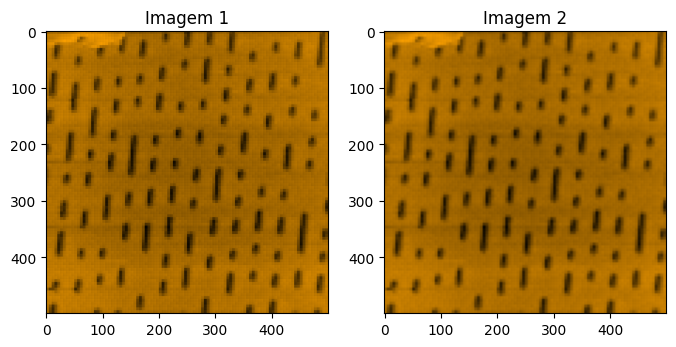

In [35]:
filtrada = colorindo(filtro_mediana(plano_normal),cor)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Exibe a primeira imagem na primeira subtrama.
axs[0].imshow(colorida)
axs[0].set_title('Imagem 1')

# Exibe a segunda imagem na segunda subtrama.
axs[1].imshow(filtrada)
axs[1].set_title('Imagem 2')

In [37]:
plano_normal

array([[152.66380331, 154.99221402, 157.32062472, ..., 160.95494981,
        163.28336052, 165.61177123],
       [151.28500209, 153.6134128 , 155.94182351, ..., 159.57614859,
        161.9045593 , 164.23297001],
       [149.90620087, 152.23461158, 154.56302229, ..., 158.19734737,
        160.52575808, 162.85416879],
       ...,
       [169.03561277, 171.36402348, 173.69243418, ..., 194.86765965,
        197.19607036, 199.52448106],
       [167.65681155, 169.98522226, 172.31363297, ..., 193.48885843,
        195.81726914, 198.14567984],
       [166.27801033, 168.60642104, 170.93483175, ..., 192.11005721,
        194.43846792, 196.76687862]])

In [38]:
filtro_mediana(plano_normal)

array([[153.13861, 154.30281, 156.63123, ..., 160.26555, 162.59396,
        163.75816],
       [152.4492 , 153.61342, 155.94182, ..., 159.57614, 161.90456,
        163.06877],
       [151.0704 , 152.23462, 154.56302, ..., 158.19734, 160.52576,
        161.68996],
       ...,
       [170.19981, 171.36403, 173.69243, ..., 194.86766, 197.19608,
        198.36028],
       [168.82101, 169.98523, 172.31363, ..., 193.48886, 195.81728,
        196.98148],
       [168.13162, 169.29582, 171.62424, ..., 192.79945, 195.12787,
        196.29207]], dtype=float32)

[1] Como converter imagens em array NumPy? – Acervo Lima. Disponível em: <https://acervolima.com/como-converter-imagens-em-array-numpy/>. Acesso em: 23 set. 2023.

[2‌] Como remover elementos específicos de uma array NumPy? – Acervo Lima. Disponível em: <https://acervolima.com/como-remover-elementos-especificos-de-uma-array-numpy/>. Acesso em: 23 set. 2023.

‌